In [9]:
from tensorflow.keras.models import load_model
from tkinter import filedialog
from cv2 import imread, cvtColor, COLOR_BGR2RGB, resize as cv2resize
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import os
from tensorflow.image import resize as tfresize
from numpy import expand_dims

In [10]:
model = load_model("new_imageclassifier.h5")

In [11]:
dir = filedialog.askdirectory()
print(dir)

/home/varadv3/Documents/Intership/Saved Model/notebook/data


In [12]:
files = os.listdir(dir)
print(files)

['image_002.jpg', 'image_001 copy.jpg', 'image_001.jpg', 'image_003.jpg', 'image_005 copy.jpg', 'image_004.jpg', 'image_004 copy.jpg', 'image_002 copy.jpg', 'image_005.jpg', 'image_003 copy.jpg']


In [13]:
memes = []
regular = []

In [14]:
for file in files:
    img = imread(os.path.join(dir, file))
    res = tfresize(img, (256, 256))
    yhat = model.predict(expand_dims(res / 255, 0), verbose=0)
    if yhat > 0.5:
        regular.append(os.path.join(dir, file))
    else:
        memes.append(os.path.join(dir, file))

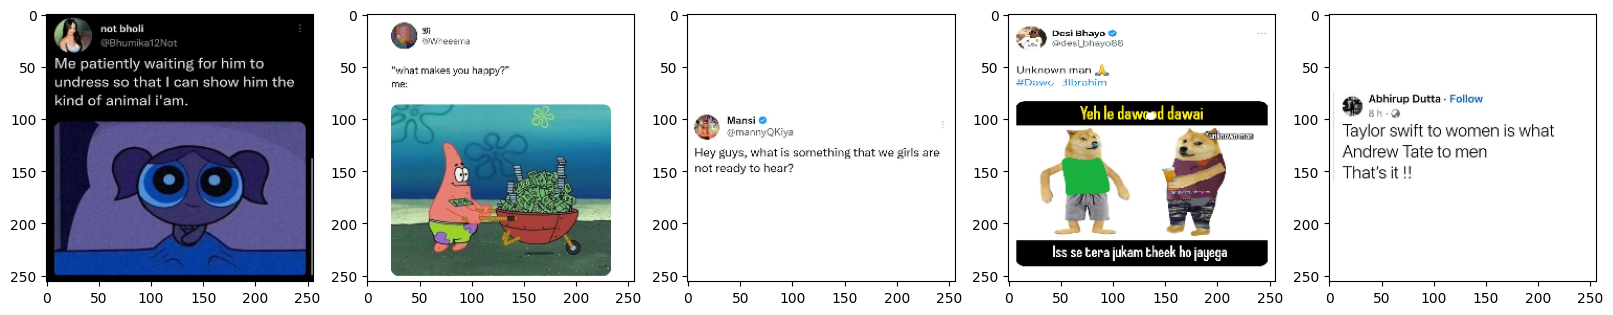

In [15]:
fig, ax = plt.subplots(ncols=len(memes), figsize=(20, 20))
for idx, meme in enumerate(memes):
    img = imread(os.path.join(dir, meme))
    img = cv2resize(img, (256, 256))
    img = cvtColor(img, COLOR_BGR2RGB)
    ax[idx].imshow(img.astype(int), aspect=1)

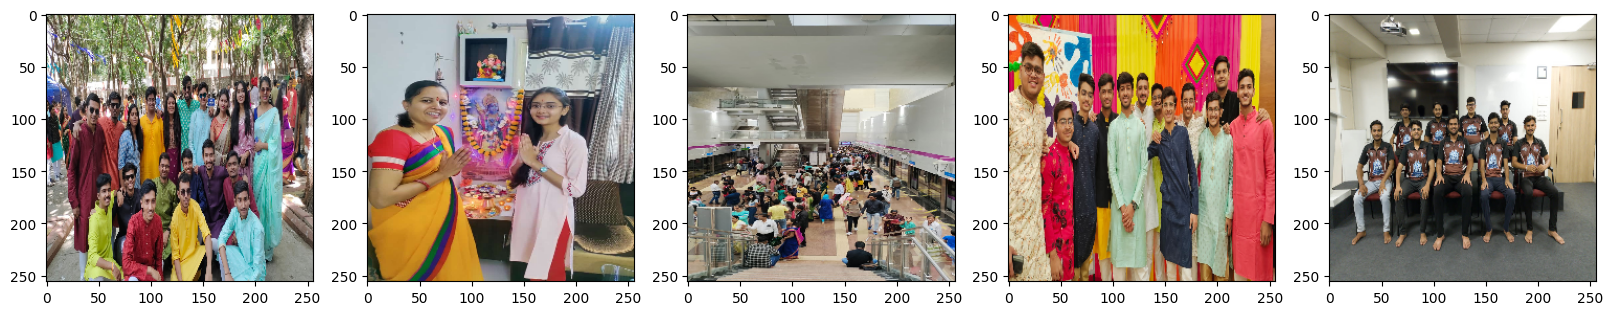

In [16]:
fig, ax = plt.subplots(ncols=len(regular), figsize=(20, 20))
for idx, reg in enumerate(regular):
    img = imread(os.path.join(dir, reg))
    img = cv2resize(img, (256, 256))
    img = cvtColor(img, COLOR_BGR2RGB)
    ax[idx].imshow(img.astype(int), aspect=1)

In [17]:
for meme in memes:
    os.remove(os.path.join(dir, meme))